<a href="https://colab.research.google.com/github/GildaRech/test-live-coding/blob/master/Gilda_Rech_Bansimba_LogRegression_students_version_OK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

# Logistic Regression Implementation

# Instructions:
1. Save a copy of this notebook in your drive;
2. Name it by: `Your_fullname_LogRegression.ipynb`
3. Close the original notebook
4. Start typing your codes.

`Note:` Discuss with your neighbors.

# Part 1: Data preparation

## Import Dataset Libraries

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Question 0: Import the dataset Dataset

In [11]:
path= '/content/diabetes.csv'
data= pd.read_csv(path)

Question 1: Print the first five rows of the Dataset

In [10]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Question 2: Check the types of your variables/features

In [12]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Question 3: Describe your dataset

In [13]:
data.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  ...  Age  Outcome
0              6      148  ...   50        1
1              1       85  ...   31        0
2              8      183  ...   32        1
3              1       89  ...   21        0
4              0      137  ...   33        1
..           ...      ...  ...  ...      ...
763           10      101  ...   63        0
764            2      122  ...   27        0
765            5      121  ...   30        0
766            1      126  ...   47        1
767            1       93  ...   23        0

[768 rows x 9 columns]>

Question 4: write a function that scale your features.
`Hint:` $x'= \dfrac{x-\mu}{\sigma}$ 
where $\mu$ is the mean and $\sigma$ the standard deviation of $x$.

In [25]:
def scale(x):
  xp=(x-np.mean(x))/np.std(x)
  return xp

Question 5: Scale your features, except the target. 

In [30]:
X = data.iloc[:,:-1]
data.iloc[:,:-1]=scale(X)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,0
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,0
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,0
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1


Question 6: Write a function that split your (x,y) to (x_train, y_train) and (x_test, y_test).
`Note:` This function must return an arrays.

In [31]:
def split_data(df, train_percent= 0.8):
  np.random.seed(2)
  perm = np.random.permutation(df.index)

  n= len(df)
  train_index = int(train_percent * n)

  train = df.iloc[perm[:train_index]]
  test = df.iloc[perm[train_index:]]

  x_train, x_test, y_train, y_test= train.iloc[:, :-1], test.iloc[:, :-1], train.iloc[:, -1], test.iloc[:, -1]
  return x_train.values, x_test.values, y_train.values, y_test.values

In [33]:
x_train, x_test, y_train, y_test= split_data(data) 
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((614, 8), (614,), (154, 8), (154,))

# Part 2: Logistic Regression without Regularization.

## Recaps:
1. Logistic/sigmoid function of $z$:
\begin{equation}
g(z)= \dfrac{1}{1+ exp(-z)}
\end{equation}
where $z= x^t \theta$ and $x, y \in \mathbb{R}^d$.
2. Derivative of Logistic/sigmoid function with respective to $z$:
\begin{equation}
dg(z)= g(z)(1-g(z))
\end{equation}
3. Cross-entropy loss:
\begin{equation}
l(\theta)= -\sum_{i= 1}^{N} \left(y_{true} \times \log y_{pred} + (1-y_{true}) \times \log (1-y_{pred}) \right)
\end{equation}
where $y_{true}= g(z)$, $z= x^t \theta$ and $y_{true}$ is the ground-truth for a given $x$.

4. Derivative of Cross-entropy loss with respective to $\theta$:
\begin{equation}
dl(\theta)= -\sum_{i= 1}^{N} x^t\left(y_{true} -y_{ped} \right)
\end{equation}
5. Apply Batch gradient descent to update $\theta$.

Question: Create a class called LogReg. See the description in the below cells.


In [126]:
class logistic_regression:
  """class that implements logistic regression"""
  def __init__(self, x_test, y_test, num_iters, threshold= 0.5, tolerance= 1e-10, lr= 0.00001):
    self.num_iters= num_iters
    self.threshold= threshold
    self.tolerance= tolerance
    self.lr= lr
    self.theta= None
    self.x_test= x_test
    self.y_test= y_test
    self.cost_history= []
    self.cost_history_test= []

  def add_ones(self, x):
    x_new= np.concatenate((np.ones((len(x),1)), x), axis = 1)
    return x_new

  def sigmoid(self, x, theta):
    z= x@theta
    return 1/(1 + np.exp(-z))

  def cross_entropy(self, x, y_true):
    n = x.shape[0]
    y_pred = self.sigmoid(x, self.theta)
    Cost = -np.sum(y_true*np.log(y_pred)+(1-y_true)*np.log(1-y_pred))/n  
    return Cost

  def fit(self, x,y):
    x= self.add_ones(x) # Add ones to x
    y= y.reshape(-1, 1) # reshape y. This is optional, do it if needed

    self.x_test= self.add_ones(self.x_test) # Add ones to x
    self.y_test= self.y_test.reshape(-1, 1) # reshape y. This is optional, do it if needed

    self.theta= np.zeros((x.shape[1], 1))# Initialize theta to zeros vector >>> (x.shape[1])
    current_iter= 1
    norm= 1

    while (norm >= self.tolerance and current_iter < self.num_iters):
      theta_old = self.theta.copy() # Get old theta

      # make predictions
      y_pred= self.sigmoid(x, self.theta) # using sigmoid function 

      # Gradient of cross-entropy
      grad= -x.T@(y - y_pred)
      grad= grad.reshape(-1, 1) # Reshape, if it is needed

      # update rules
      self.theta= self.theta - self.lr*grad
      # Compute the training loss
      self.cost_history.append(self.cross_entropy(x, y))      # Convergence criteria:
      self.cost_history_test.append(self.cross_entropy(self.x_test, self.y_test))
      if current_iter%100 == 0:
        print(f'cost for {current_iter} iteration : {self.cross_entropy(x, y)}')
      norm = np.linalg.norm(theta_old - self.theta)
      current_iter += 1
  
  def predict_proba(self, x):
    x= self.add_ones(x) # Apply add ones to x
    y_pred_prob= self.sigmoid(x, self.theta) # Predict proba with sigmoid
    return y_pred_prob
  
  def predict(self, x):
    proba= self.predict_proba(x) # Get probability of x
    result= [np.round(i) for i in proba]  # Convert proba to 0 or 1. hint: list comprehension
    return  result
  
  def plot(self):
      plt.plot(self.cost_history, label="Train loss")
      plt.plot(self.cost_history_test, label="Test loss")
      plt.legend()

In [132]:
# Create a model by instanciating the class logistic_regression
model = logistic_regression(x_test, y_test, num_iters=10000)

In [133]:
%%time
model.fit(x_train, y_train)

cost for 100 iteration : 0.6361937545081015
cost for 200 iteration : 0.5987906607943532
cost for 300 iteration : 0.5730690324377251
cost for 400 iteration : 0.5546046708720571
cost for 500 iteration : 0.54086589635088
cost for 600 iteration : 0.5303427167700747
cost for 700 iteration : 0.5220927387171681
cost for 800 iteration : 0.5155022467431675
cost for 900 iteration : 0.510156146914654
cost for 1000 iteration : 0.5057642731225686
cost for 1100 iteration : 0.5021179365422827
cost for 1200 iteration : 0.49906333436891454
cost for 1300 iteration : 0.49648471097216107
cost for 1400 iteration : 0.4942933591386856
cost for 1500 iteration : 0.4924202321546067
cost for 1600 iteration : 0.4908108549079812
cost for 1700 iteration : 0.4894217386345165
cost for 1800 iteration : 0.4882178035304924
cost for 1900 iteration : 0.48717049219831987
cost for 2000 iteration : 0.48625636634166375
cost for 2100 iteration : 0.4854560477947473
cost for 2200 iteration : 0.48475340903599096
cost for 2300 ite

In [134]:
pred= model.predict(x_test)

In [135]:
pred

[array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([1.]),
 array([1.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([1.]),
 array([0.]),
 array([1.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([1.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([1.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([1.]),
 array([0.]),
 array([0.]),
 array([1.]),
 array([0.]),
 array([0.]),
 array([1.]),
 array([1.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([1.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([1.]),
 array([1.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([1.]),
 array([0.]),
 array([1.]),
 array([1.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([1.]),
 array([1.]),
 array

In [136]:
# Predict Proba
print(model.predict_proba(x_test))

[[0.0621027 ]
 [0.14364075]
 [0.16770029]
 [0.05649998]
 [0.68656307]
 [0.59077239]
 [0.24011922]
 [0.24245529]
 [0.03851676]
 [0.18856335]
 [0.04468985]
 [0.30989675]
 [0.6543891 ]
 [0.01782879]
 [0.64128438]
 [0.05287078]
 [0.37171023]
 [0.49402766]
 [0.341567  ]
 [0.07367515]
 [0.27098316]
 [0.47521352]
 [0.43470765]
 [0.19201003]
 [0.25107223]
 [0.80400819]
 [0.11154124]
 [0.42469167]
 [0.41338548]
 [0.20698992]
 [0.03079193]
 [0.92110075]
 [0.07050737]
 [0.40547424]
 [0.07062423]
 [0.46365743]
 [0.72786897]
 [0.44583131]
 [0.11584159]
 [0.9547328 ]
 [0.09357638]
 [0.26586146]
 [0.83754169]
 [0.91433131]
 [0.2087228 ]
 [0.07891804]
 [0.23721354]
 [0.71758088]
 [0.4111789 ]
 [0.35725047]
 [0.25488846]
 [0.67704974]
 [0.73545972]
 [0.02285975]
 [0.42272291]
 [0.18641832]
 [0.30398741]
 [0.77636051]
 [0.14298036]
 [0.91329833]
 [0.94938528]
 [0.38777932]
 [0.12882725]
 [0.06987208]
 [0.1692367 ]
 [0.0835011 ]
 [0.06106942]
 [0.0546371 ]
 [0.38977273]
 [0.54234849]
 [0.59467355]
 [0.50

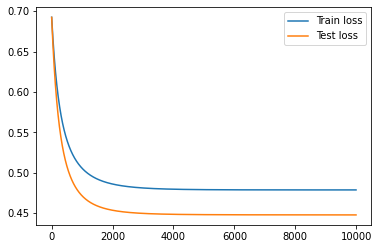

In [137]:
model.plot()

## Push your works to Githup Repo

Setps:
1. Fork the repo: `https://github.com/AMMI-2022/test-live-coding`
2. Clone in your colab;
3. Push
4. Make a pull request

Set your credential

In [ ]:
my_token= ""
my_repository= "https://github.com/AMMI-2022/live-coding"
username= "GildaRech"
useremail= "gbansimba@aimsammi.org"

Clone the repo

In [ ]:
! git clone https://github.com/{username}/{my_repository}.git

In [ ]:
! git remote -v

Copy data to test-live-coding folder

In [ ]:
!cp diabetes.csv /content/test-live-coding

In [ ]:
%cd /content/test-live-coding

In [ ]:
!git status

In [ ]:
!git config user.email useremail
!git config user.name username

In [ ]:
!git add .
!git commit -m "Add my files"

In [ ]:
!git status

In [ ]:
!git push -u origin master --force

# If you cannot push, use:

In [ ]:
!git remote rm origin

In [ ]:
!git remote add origin https://{my_token}@github.com/{username}/{my_repository}.git
!git remote -v

In [ ]:
!git push -u origin master --force

---



---



---

# Assignment

Just follow the class logistic_regression, try to implement Logistic regression with `l1`, `l2` and `l1-l2`. That we call respectively `Lasso (least absolute shrinkage and selection operator)`, `Ridge` and `ElasticNet`.
Given cross-entropy:
\begin{equation}
  l(θ)= -\sum_{i= 1}^{N} \left(y_{true} \times \log y_{pred} + (1-y_{true}) \times \log (1-y_{pred}) \right)
\end{equation}

1. l1-regularization (LASSO):

\begin{equation}
   l(θ) + λ\| \theta\|_1
\end{equation}


2. l2-regularization (Ridge):
\begin{equation}
   l(θ)+ λ\| \theta\|_2
\end{equation}

3. l1-l2-regularization (ElasticNet):
\begin{equation}
  l(θ) + λ_1\| \theta\|_1 + λ_2\| \theta\|_2
\end{equation}

`Note: please use mini-batch as learning algorithm`

In [ ]:
class logistic_regression_l1:
  pass

In [ ]:
class logistic_regression_l2:
  pass

In [ ]:
class logistic_regression_l1_l2:
  pass

# Concepts [Assignment]:
1. Why there is no close form for cross-entropy loss?
2. Why we need cross-entropy loss instead of mse?
3. Why is logistic regression a type of classification technique and not a regression?